# Plot downloaded tiff images

Plot the tiff images downloaded with the `download_tile_sentinel_loader.py` script in the `sentinelcache` gitignored folder.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# import threebee

pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd
from IPython.display import display


def left_align(df: pd.DataFrame):
    """Set the input dataframe to have its text cells all left aligned."""
    left_aligned_df = df.style.set_properties(
        **{"text-align": "left", "vertical-align": "top"}
    )
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector="th", props=[("text-align", "left"), ("vertical-align", "top")])]
    )
    return left_aligned_df


def display_full(df: pd.DataFrame):
    """Display an input dataframe by showing all of the cells content, and
    with left alignment of the cells."""

    with pd.option_context(
        "display.max_rows",
        None,
        "display.max_columns",
        None,
        "display.max_colwidth",
        None,
    ):
        display(left_align(df))

## Plot the downloaded image of 2022/07/16

Open metadata csv

In [3]:
path_to_csv = (
    "../sentinelcache/apiquery/"
    + "Sentinel-2-S2MSI2A-224aa7cd048db6785866f6e8c60e9d2d-20220712-20220717-0-80.csv"
)

df_query = pd.read_csv(path_to_csv)

In [4]:
display_full(df_query)

,Unnamed: 0,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,illuminationazimuthangle,illuminationzenithangle,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,gmlfootprint,footprint,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid
0,9161917a-4b6b-46c9-adf0-55a3c7f4fc80,S2A_MSIL2A_20220716T071631_N0400_R006_T38PNS_20220716T111403,https://apihub.copernicus.eu/apihub/odata/v1/Products('9161917a-4b6b-46c9-adf0-55a3c7f4fc80')/$value,https://apihub.copernicus.eu/apihub/odata/v1/Products('9161917a-4b6b-46c9-adf0-55a3c7f4fc80')/,https://apihub.copernicus.eu/apihub/odata/v1/Products('9161917a-4b6b-46c9-adf0-55a3c7f4fc80')/Products('Quicklook')/$value,"Date: 2022-07-16T07:16:31.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 1.07 GB",False,2022-07-16 11:14:03,2022-07-16 07:16:31.024,2022-07-16 07:16:31.024,2022-07-16 13:20:01.777,36897,6,59.586614,23.580963,0.000843,64.228451,10.098915,0.223085,1.354229,5.071589,0.000000,25.183943,S2A_OPER_MSI_L1C_TL_ATOS_20220716T090859_A036897_T38PNS_N04.00,"10.855481221715785,44.999817011879315 10.853842437207256,46.00436820558513 9.86092309180465,46.00121226361808 9.862408925783894,44.99981758698478 10.855481221715785,44.999817011879315","MULTIPOLYGON (((46.00121226361808 9.86092309180465, 46.00436820558513 10.853842437207256, 44.999817011879315 10.855481221715785, 44.99981758698478 9.862408925783894, 46.00121226361808 9.86092309180465)))",SAFE,4.000000,Sentinel-2,S2A_MSIL2A_20220716T071631_N0400_R006_T38PNS_20220716T111403.SAFE,Multi-Spectral Instrument,MSI,1.07 GB,GS2A_20220716T071631_036897_N04.00,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220716T111403_S20220716T073109_N04.00,S2A_OPER_MSI_L2A_TL_ATOS_20220716T111403_A036897_T38PNS_N04.00,S2A_MSIL2A_20220716T071631_N0400_R006_T38PNS_20220716T111403,9161917a-4b6b-46c9-adf0-55a3c7f4fc80
1,b3d2568c-400d-4233-9313-2b440a2b7320,S2A_MSIL2A_20220716T071631_N0400_R006_T38PMR_20220716T111403,https://apihub.copernicus.eu/apihub/odata/v1/Products('b3d2568c-400d-4233-9313-2b440a2b7320')/$value,https://apihub.copernicus.eu/apihub/odata/v1/Products('b3d2568c-400d-4233-9313-2b440a2b7320')/,https://apihub.copernicus.eu/apihub/odata/v1/Products('b3d2568c-400d-4233-9313-2b440a2b7320')/Products('Quicklook')/$value,"Date: 2022-07-16T07:16:31.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 1.07 GB",False,2022-07-16 11:14:03,2022-07-16 07:16:31.024,2022-07-16 07:16:31.024,2022-07-16 13:16:31.005,36897,6,58.660027,24.755465,0.001068,52.086771,0.000000,0.771086,8.205085,38.830453,0.000000,47.035536,S2A_OPER_MSI_L1C_TL_ATOS_20220716T090859_A036897_T38PMR_N04.00,"9.95016277864261,44.08736412982451 9.951396178480556,45.08904151036389 8.95827174092904,45.08878652065255 8.957163490003405,44.089977224992396 9.95016277864261,44.08736412982451","MULTIPOLYGON (((44.089977224992396 8.957163490003405, 45.08878652065255 8.95827174092904, 45.08904151036389 9.951396178480556, 44.08736412982451 9.95016277864261, 44.089977224992396 8.957163490003405)))",SAFE,4.000000,Sentinel-2,S2A_MSIL2A_20220716T071631_N0400_R006_T38PMR_20220716T111403.SAFE,Multi-Spectral Instrument,MSI,1.07 GB,GS2A_20220716T071631_036897_N04.00,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220716T111403_S20220716T073109_N04.00,S2A_OPER_MSI_L2A_TL_ATOS_20220716T111403_A036897_T38PMR_N04.00,S2A_MSIL2A_20220716T071631_N0400_R006_T38PMR_20220716T111403,b3d2568c-400d-4233-9313-2b440a2b7320
2,92c926ab-5e6d-4adb-b4b9-3c9fe57fec92,S2A_MSIL2A_20220716T071631_N0400_R006_T38PMS_20220716T111403,https://apihub.copernicus.eu/apihub/

Load the data and show the result

In [5]:
path_to_tiff = (
    "../sentinelcache/tmp/"
    + "2022-07-18-NDVI-60m-50678036e5ba43459b78898fe0ac309c.tiff"
)


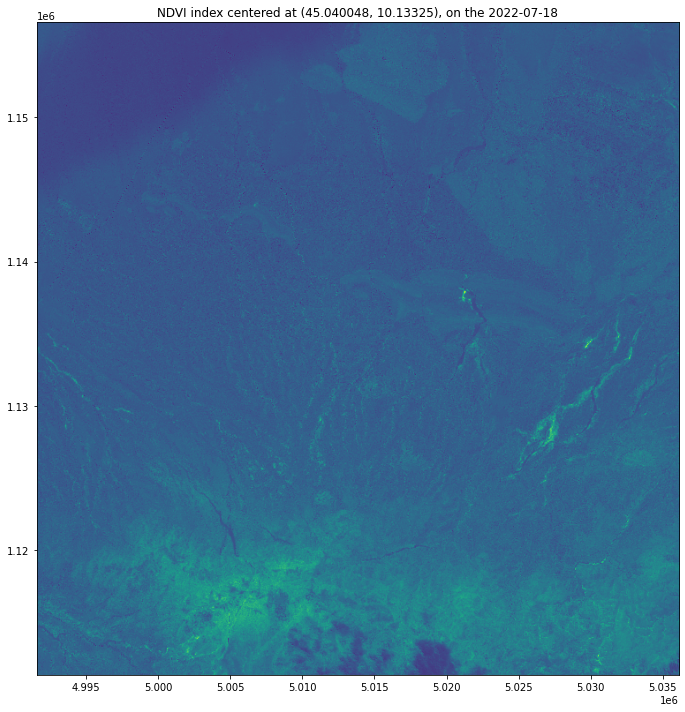

<Figure size 432x288 with 0 Axes>

In [6]:
img = rasterio.open(path_to_tiff)

lat_center = 45.040048
long_center = 10.133250

plt.figure(figsize=(12,12))
plt.title(f"NDVI index centered at ({lat_center}, {long_center}), on the 2022-07-18")
show(img)
plt.savefig("2022_07_18_ndvi_index.png")
plt.show()

## Notes

The NDVI index has been calculated from the `04` and `08` bands as such:

$$ ndvi = (nir - red) / (nir + red) $$